<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220811_Amazon_Products_Reviews_Sentiment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/07/20/amazon-product-reviews-sentiment-analysis-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [17]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sentiments = SentimentIntensityAnalyzer()

In [22]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/Amazon_Sentiment_Analysis/all_kindle_review .csv')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Unnamed: 0.1    12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [24]:
data.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [26]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            12000 non-null  object
 1   helpful         12000 non-null  object
 2   rating          12000 non-null  int64 
 3   reviewText      12000 non-null  object
 4   reviewTime      12000 non-null  object
 5   reviewerID      12000 non-null  object
 6   reviewerName    11962 non-null  object
 7   summary         12000 non-null  object
 8   unixReviewTime  12000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 843.9+ KB


In [28]:
data.reviewerName.fillna('0', inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            12000 non-null  object
 1   helpful         12000 non-null  object
 2   rating          12000 non-null  int64 
 3   reviewText      12000 non-null  object
 4   reviewTime      12000 non-null  object
 5   reviewerID      12000 non-null  object
 6   reviewerName    12000 non-null  object
 7   summary         12000 non-null  object
 8   unixReviewTime  12000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 843.9+ KB


In [30]:
data.head()

,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [31]:
ratings = data.rating.value_counts()
ratings

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

In [35]:
labels = ratings.index
labels

Int64Index([5, 4, 3, 2, 1], dtype='int64')

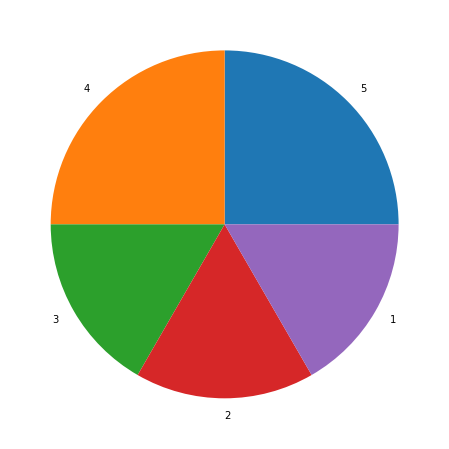

In [36]:
plt.figure(figsize=(10,8))
plt.pie(ratings, labels=labels)
plt.show()

In [38]:
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['reviewText']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['reviewText']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['reviewText']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['reviewText']]

In [40]:
df = data[['reviewText', 'rating', 'Positive', 'Negative', 'Neutral', 'Compound']]
df.head()

,reviewText,rating,Positive,Negative,Neutral,Compound
0,"Jace Rankin may be short, but he's nothing to ...",3,0.163,0.129,0.708,0.9559
1,Great short read. I didn't want to put it dow...,5,0.283,0.044,0.673,0.9645
2,I'll start by saying this is the first of four...,3,0.138,0.000,0.862,0.8555
3,Aggie is Angela Lansbury who carries pocketboo...,3,0.070,0.078,0.851,-0.1280
4,I did not expect this type of book to be in li...,4,0.139,0.000,0.861,0.4404


In [41]:
x = sum(df['Positive'])
y = sum(df['Negative'])
z = sum(df['Neutral'])
c = sum(df['Compound'])

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)
print("Compound: ", c)


Positive:  2154.4450000000006
Negative:  828.1390000000002
Neutral:  9017.480999999978
Compound:  5840.896300000042


In [42]:
def sentiment_analysis(a,b,c):
  if (a>b) and (b>c):
    print('Positive')
  elif(b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

In [43]:
sentiment_analysis(x,y,z)

Neutral
